Módulo: Bibliotecas e APIs (Python DS libraries)<br>
Atividade de avaliação<br>
Data: 03/09/2021

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Q1:** Dado o dataset gas.csv, carregue-o em um DataFrame e, em seguida:

    1.1 Visualize suas cinco primeiras linhas e imprima suas colunas.
    1.2 Obtenha a emissão mínima e máxima de gases ao longo de todo o período de observação.
    1.3 Crie uma nova coluna no DataFrame que contenha apenas o ano (como int) presente na coluna DATE.
    1.4 Faça um agrupamento no DataFrame com o intuito de obter qual foi o ano que apresentou, em média, uma emissão máxima de gases.
    1.5 Crie um gráfico de barras que apresente a emissão média de gases entre os anos de 1980 e 2019.


In [2]:
# 1.1
df_gas = pd.read_csv('gas.csv') # Carregando o arquivo csv em dataframe
df_gas.head() # 1. Visualizando 5 primeiras linhas

,DATE,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133


In [3]:
# 1.2 Emissão mínima e máxima de gases ao longo de todo o período de observação
print('Emissão mínima:', df_gas['IPG2211A2N'].min())
print('Emissão máxima:', df_gas['IPG2211A2N'].max())

Emissão mínima: 3.3842
Emissão máxima: 128.9071


In [4]:
# 1.3 Nova coluna com o ano como tipo 'int' a partir da coluna DATE
df_gas['YEAR'] = df_gas['DATE'].str[:4].astype(int)

In [5]:
# Visualizando
df_gas.head(3)

,DATE,IPG2211A2N,YEAR
0,1939-01-01,3.3842,1939
1,1939-02-01,3.4100,1939
2,1939-03-01,3.4875,1939


In [6]:
# 1.4 Obter o ano que apresentou, em média, uma emissão máxima de gases.
# Mostra o ano com maior emissão média
print('Ano com maior emissão média:', end=' ')
print(df_gas.groupby(by=['YEAR'])['IPG2211A2N'].mean().idxmax())
print('Emissão observada:', end=' ')
print(df_gas.groupby(by=['YEAR'])['IPG2211A2N'].mean().max()) # Mostra a maior emissão média

Ano com maior emissão média: 2018
Emissão observada: 105.92933333333336


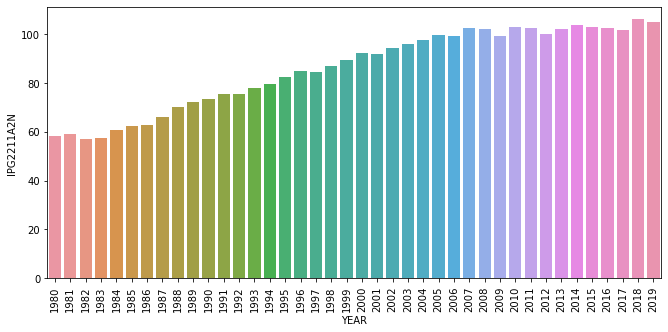

In [7]:
# 1.5 Gráfico de barras da emissão média de gases entre os anos de 1980 e 2019
# Separando os dados em um DF
df_emissoes_1980_2019 = df_gas[df_gas['YEAR'] >= 1980].groupby(by=['YEAR'])['IPG2211A2N'].mean().reset_index()

# Configurando o gráfico
plt.figure(figsize=(11,5))
sns.barplot(data=df_emissoes_1980_2019 , x='YEAR' , y='IPG2211A2N')
plt.xticks(rotation=90);

**Q2:**: Com a tabela de vendas de jogos de vídeo-games (videogames.csv), indique:

    2.1 Quais jogos estão no Top 10 de Vendas Globais nas plataformas PS3, Wii, X360 e PC.
    2.2 A proporção (percentual) de jogos criados por gênero, em: a) tabela; b)gráfico de barras; c) gráfico de pizza.
    2.3 Um gráfico de linha com a quantidade de vendas, em média, por ano, separadas pelas plataformas PS3, Wii, X360 e PSP.

In [8]:
df_games = pd.read_csv('videogame.csv')
df_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
# 2.1 Ranking geral dos 10 jogos mais vendidos 
df_games.head(10) # DF já classificado por vendas globais, mas para todas as plataformas

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [10]:
# Separando df com as plataformas escolhidas pelo exercício
df_plataformas_escolhidas = df_games[(df_games['Platform'] == 'PS3') | 
         (df_games['Platform'] == 'Wii') | 
         (df_games['Platform'] == 'X360') | 
         (df_games['Platform'] == 'PC')]

In [11]:
print(df_games.shape, df_plataformas_escolhidas.shape)

(16598, 11) (4879, 11)


In [12]:
df_plataformas_escolhidas.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38


In [13]:
# Top 10:
df_plataformas_escolhidas.head(10)[['Name','Platform']]

,Name,Platform
0,Wii Sports,Wii
2,Mario Kart Wii,Wii
3,Wii Sports Resort,Wii
7,Wii Play,Wii
8,New Super Mario Bros. Wii,Wii
13,Wii Fit,Wii
14,Wii Fit Plus,Wii
15,Kinect Adventures!,X360
16,Grand Theft Auto V,PS3
23,Grand Theft Auto V,X360


In [14]:
print('Mostrando os top 10 games para cada plataforma\n\n')

plataformas_escolhidas = ['PS3','Wii','X360','PS3']
for item in plataformas_escolhidas:
    top10 = df_plataformas_escolhidas[df_plataformas_escolhidas['Platform'] == item].reset_index().loc[0:9]['Name']
    print('Os 10 mais vendidos da Plataforma',item, ':')
    print(top10,end='\n\n')


Mostrando os top 10 games para cada plataforma


Os 10 mais vendidos da Plataforma PS3 :
0                Grand Theft Auto V
1        Call of Duty: Black Ops II
2    Call of Duty: Modern Warfare 3
3           Call of Duty: Black Ops
4                    Gran Turismo 5
5    Call of Duty: Modern Warfare 2
6               Grand Theft Auto IV
7              Call of Duty: Ghosts
8                    FIFA Soccer 13
9                     Battlefield 3
Name: Name, dtype: object

Os 10 mais vendidos da Plataforma Wii :
0                   Wii Sports
1               Mario Kart Wii
2            Wii Sports Resort
3                     Wii Play
4    New Super Mario Bros. Wii
5                      Wii Fit
6                 Wii Fit Plus
7      Super Smash Bros. Brawl
8           Super Mario Galaxy
9                 Just Dance 3
Name: Name, dtype: object

Os 10 mais vendidos da Plataforma X360 :
0                Kinect Adventures!
1                Grand Theft Auto V
2    Call of Duty: Modern Warfare 

In [15]:
# Extraindo a proporção (percentual) de jogos criados por gênero , em: 
# a) tabela; b)gráfico de barras; c) gráfico de pizza

In [16]:
# 2a) Tabela
jogos_por_genero = 100 * df_games['Genre'].value_counts(normalize=True)
df_proporcao_generos = pd.DataFrame(jogos_por_genero).reset_index()
df_proporcao_generos.columns=['Genre','%']
df_proporcao_generos

,Genre,%
0,Action,19.978311
1,Sports,14.134233
2,Misc,10.477166
3,Role-Playing,8.964936
4,Shooter,7.892517
5,Adventure,7.747921
6,Racing,7.525003
7,Platform,5.337993
8,Simulation,5.223521
9,Fighting,5.109049


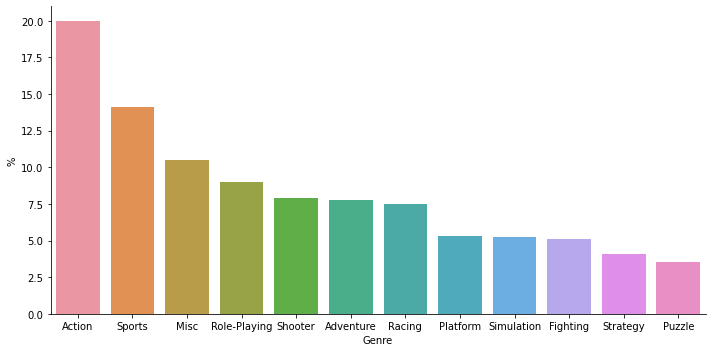

In [17]:
# 2b) Barras
sns.catplot(data=df_proporcao_generos, x='Genre', y='%', kind='bar',
    height=5, aspect=10/5);

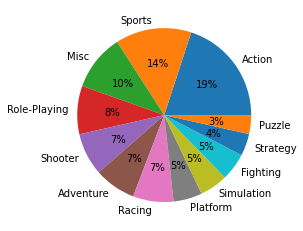

In [18]:
# 2c) Pizza
plt.pie(df_games['Genre'].value_counts(), autopct='%d%%', labels=df_games['Genre'].value_counts().index);

In [19]:
# 2.3 Um gráfico de linha com a quantidade de vendas, em média, por ano, 
# separadas pelas plataformas PS3, Wii, X360 e PSP.
df_aux1 = df_plataformas_escolhidas.groupby(by=['Platform','Year'])['Global_Sales'].sum().reset_index()

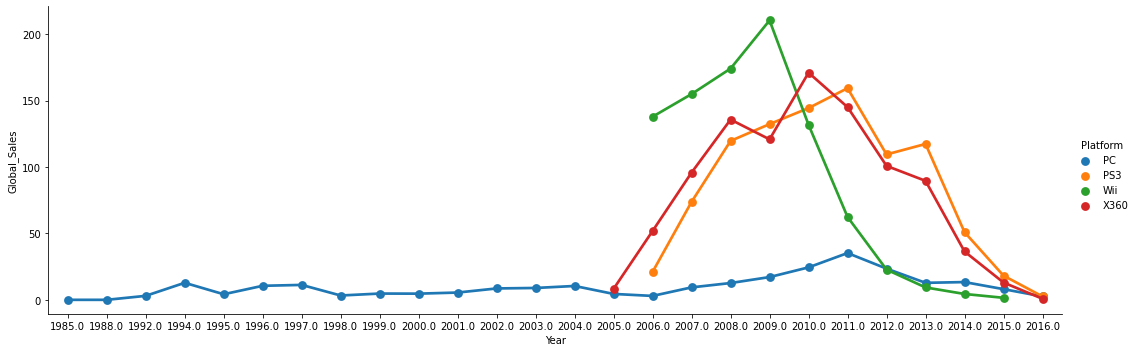

In [20]:
# Gráfico
sns.catplot(data=df_aux1, y='Global_Sales', x='Year', hue='Platform', 
            kind='point',height=5, aspect=3);

**Q3:** Considerando os dados do dataset fish.csv, faça uma análise exploratória dos dados, criando:

    Vários gráficos (em uma mesma figura) combinando cada par de característica (feature) dos peixes, e atribuindo uma cor diferente para cada espécie.
    Crie um gráfico de distribuição da largura dos peixes (Width). Não deixe de incluir o KDE.
    Crie um mapa de calor que apresente a correlação entre cada feature do peixe. Anote os dados no gráfico e utilize o cmap=coolwarm.


In [21]:
df_fish = pd.read_csv('fish.csv')
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


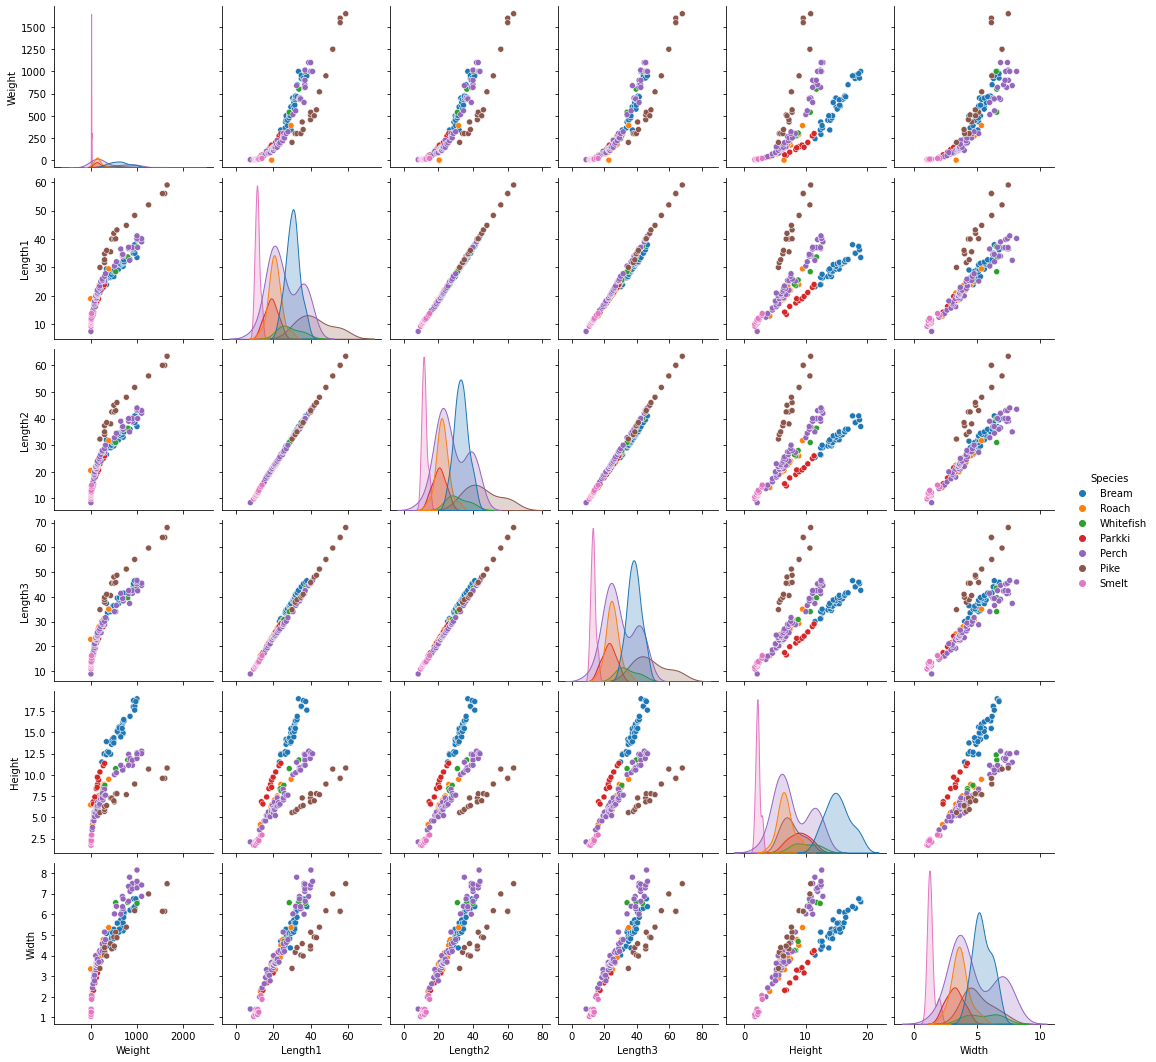

In [22]:
# Pairplot cor por espécie
sns.pairplot(data=df_fish, hue='Species');

Crie um gráfico de distribuição da largura dos peixes (Width). Não deixe de incluir o KDE.

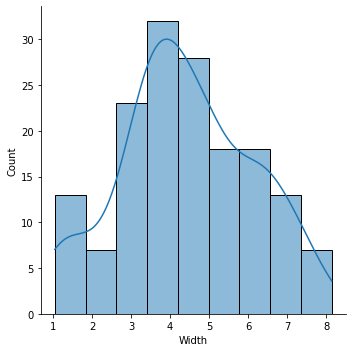

In [23]:
sns.displot(data=df_fish, x='Width', kde=True); # Gráfico de distribuição exibindo curva kernel density estimation (KDE)

Crie um mapa de calor que apresente a correlação entre cada feature do peixe. Anote os dados no gráfico e utilize o cmap=coolwarm.

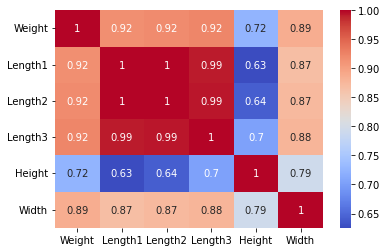

In [24]:
sns.heatmap(data=df_fish.corr(), annot=True, cmap='coolwarm');

**Q4:** Utilize os dados do arquivo salaries.csv para explorar as diferenças salariais entre homens e mulheres que estão em um mesmo posto. Por exemplo, Female Managers e Male Managers.

In [25]:
df_salarios = pd.read_csv('salarios.csv', sep=';')
df_salarios.head()

,year,females,femalesmanagers,femaleprofessionals,femaletechniciansandtradesworkers,femalecommunityandpersonalserviceworkers,femaleclericalandadministrativeworkers,femalesalesworkers,femalemachineryoperatorsanddrivers,femalelabourers,...,malelabourers,persons,personmanagers,personprofessionals,persontechniciansandtradesworkers,personcommunityandpersonalserviceworkers,personclericalandadministrativeworkers,personsalesworkers,personmachineryoperatorsanddrivers,personlabourers
0,2004,Females,26.14,29.02,17.90,18.01,19.98,14.79,16.27,16.48,...,17.21,Persons,30.60,31.22,21.58,19.03,20.80,16.13,20.39,16.95
1,2005,Females,28.10,30.00,18.86,18.20,20.95,15.39,21.49,16.71,...,17.85,Persons,31.37,31.91,21.42,19.60,21.71,16.70,21.09,17.44
2,2006,Females,28.60,30.56,19.64,18.84,21.73,16.19,17.37,16.32,...,18.18,Persons,32.82,32.28,22.18,20.04,22.82,17.57,21.00,17.48
3,2007,Females,36.43,31.93,20.98,19.85,23.27,16.78,18.04,17.54,...,19.68,Persons,37.95,35.01,23.52,21.32,24.61,18.28,22.55,18.88
4,2008,Females,32.68,32.93,20.30,20.97,23.67,17.44,20.27,17.27,...,19.79,Persons,36.24,35.84,24.19,24.25,24.76,19.34,23.33,18.85


In [26]:
df_salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   year                                      14 non-null     int64  
 1   females                                   14 non-null     object 
 2   femalesmanagers                           14 non-null     float64
 3   femaleprofessionals                       14 non-null     float64
 4   femaletechniciansandtradesworkers         14 non-null     float64
 5   femalecommunityandpersonalserviceworkers  14 non-null     float64
 6   femaleclericalandadministrativeworkers    14 non-null     float64
 7   femalesalesworkers                        14 non-null     float64
 8   femalemachineryoperatorsanddrivers        14 non-null     float64
 9   femalelabourers                           14 non-null     float64
 10  males                                   

#### Configuração dos valores e nomes para construção dos gráficos

In [27]:
# Tuplas com os pares de índices (females, males) de cada posto de trabalho
pairs = [(2,11), (3,12), (4,13), (5,14), (6,15), (7,16), (8,17), (9,18)]

# Categorias
labels = ['Males','Females']

# Profissões
works = [
    'Managers', 
    'Professionals',
    'Technicians and trades workers',
    'Community and personal service workers',
    'Clerical and administrative workers',
    'Salesworkers',
    'Machinery operators and drivers',
    'labourers'    
]

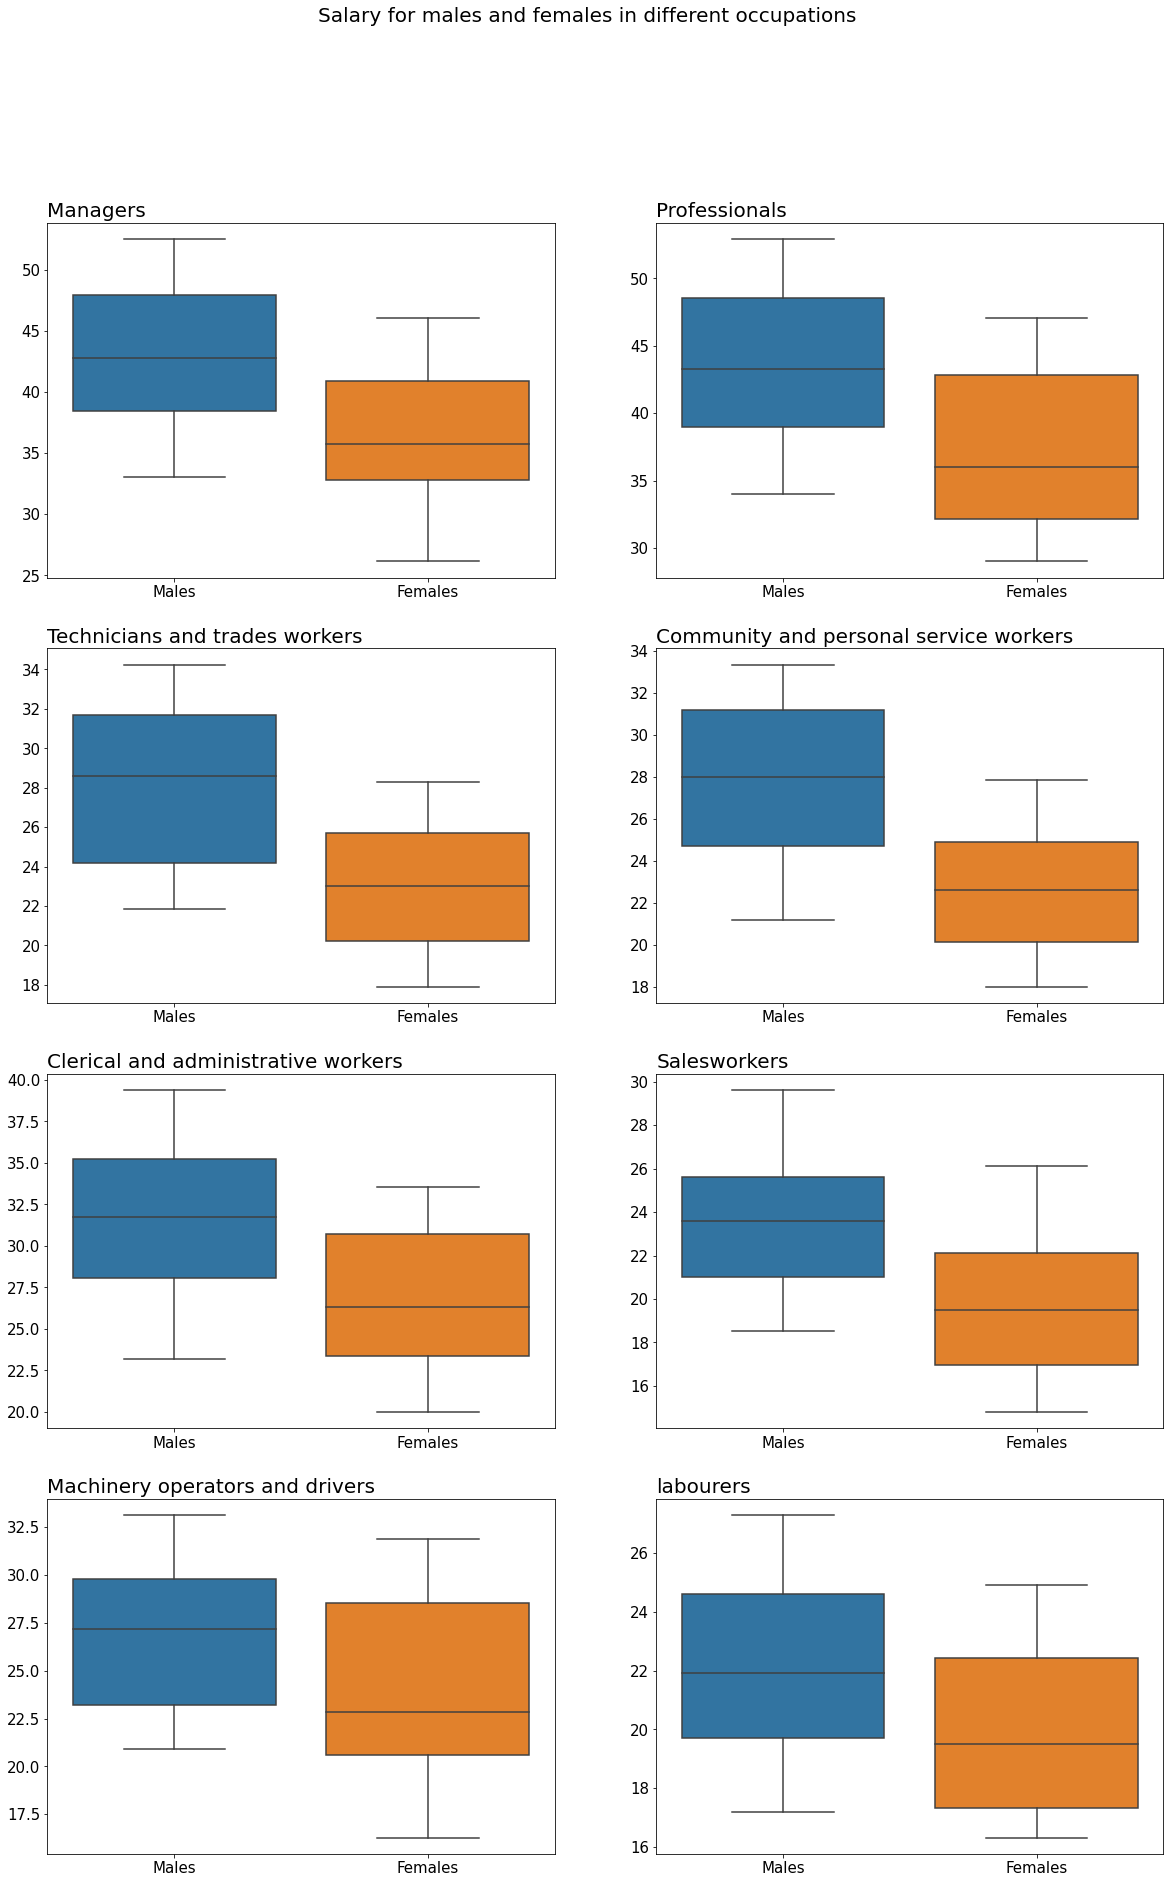

In [28]:
# Plotar cada gráfico em uma mesma figura
contador=0
n_row=0
n_col=0


fig, axs = plt.subplots(nrows=4, ncols=2,figsize=(20,30))
plt.suptitle('Salary for males and females in different occupations',fontsize=20)
#plt.plot()

for item in pairs:
    
    
    df_aux= pd.concat([df_salarios.iloc[:,item[1]], df_salarios.iloc[:,item[0]]],axis=1)
    df_aux.columns=labels
    title = works[contador]
    
    sns.boxplot(data=df_aux,ax=axs[n_row,n_col]).set_title(title,loc='left',fontsize=20)
    axs[n_row,n_col].tick_params(labelsize=15)
    
    n_col += 1
    
    if n_col == 2:
        n_col = 0
        n_row += 1
    
    contador += 1